# Ironhack Paris: Data Me if You Can <br>16 September 2019
## <font color=blue> Intro to Data Visualization with Python - Video Game Sales and Ratings</font>
Visualizations of the Video Game Sales and Ratings Dataset from Kaggle

Data Source: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

In [63]:
# Import libraries and CSV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

%matplotlib inline
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')


### A - Explore Data

In [64]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df.shape

(16719, 16)

In [67]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [68]:
null_cols = df.isnull().sum()
null_cols

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Note that publisher and developer appear to be the same. Lets clean that up.

In [69]:
#df['Publisher'] = np.where(df['Publisher'].isna()==True, df['Developer'], df['Publisher'])
df.drop(['Developer'], axis=1, inplace=True)
df = df[df['Year_of_Release'].isna()==False]

In [7]:
df['Rating'].value_counts()

E       3991
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

In [8]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [9]:
df['Genre'].value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [10]:
df['User_Score'].value_counts()

tbd    2425
7.8     324
8       290
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
7.7     240
7.3     236
8.4     223
7.6     220
7       220
7.4     215
8.6     211
6.8     197
8.7     188
8.8     186
7.1     180
7.2     167
8.9     153
6.6     148
6.9     143
6.3     138
6.7     128
6       127
6.5     125
9       120
6.2     113
       ... 
2.5      12
2.4      11
2        11
9.4      11
2.1       9
2.9       9
1.7       9
2.7       8
9.5       6
1.8       6
2.2       6
1.4       5
2.6       4
1.6       3
1.2       3
1.5       2
1.3       2
0.6       2
0.3       2
1.1       2
0.7       2
2.3       2
9.6       2
0.2       2
0.9       2
0.5       2
1.9       2
1         2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

In [73]:
df['User_Score'] = np.where(df['User_Score']=='tbd', None, df['User_Score'])
df['User_Score'] = df['User_Score'].astype(float)

In [75]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16450.000000,16450.000000,16450.000000,16450.000000,16450.000000,7983.000000,7983.000000,7463.000000,7463.000000
mean,2006.487356,0.264041,0.145909,0.078464,0.047582,0.536252,68.994363,26.441313,7.126330,163.015141
std,5.878995,0.818324,0.506639,0.311046,0.187973,1.558437,13.920060,19.008136,1.499447,563.863327
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [76]:
df['Critic_Score'] = df['Critic_Score']/10

df['Year_of_Release'] = df['Year_of_Release'].astype(int)

Score info appears to be spotty. For our purposes, lets divide data set into 2:

1. Sales information only.
2. Sales and Ratings for games with no "Null" Values

In [77]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            32
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8467
Critic_Count       8467
User_Score         8987
User_Count         8987
Rating             6681
dtype: int64

#### Create sub-frame

In [78]:
dfc = df[df['User_Score'].isna() != True]

In [79]:
dfc.isnull().sum()

Name                 0
Platform             0
Year_of_Release      0
Genre                0
Publisher            2
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Critic_Score       569
Critic_Count       569
User_Score           0
User_Count           0
Rating              83
dtype: int64

In [80]:
dfc = dfc.dropna()
dfc.shape

(6825, 15)

In [81]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 15 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null int32
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null float64
User_Count         6825 non-null float64
Rating             6825 non-null object
dtypes: float64(9), int32(1), object(5)
memory usage: 826.5+ KB


In [82]:
dfc.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,7.027209,28.931136,7.185626,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,1.386857,19.224165,1.439942,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,1.300000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,6.200000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,7.200000,25.000000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,8.000000,39.000000,8.200000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,9.800000,113.000000,9.600000,10665.000000


In [83]:
dfc.reset_index(inplace=True, drop=True)
dfc.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,7.6,51.0,8.0,322.0,E
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.2,73.0,8.3,709.0,E
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,8.0,73.0,8.0,192.0,E
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,8.9,65.0,8.5,431.0,E
4,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,5.8,41.0,6.6,129.0,E


# B - Visualize Data

Begin with a brief intro to plotting

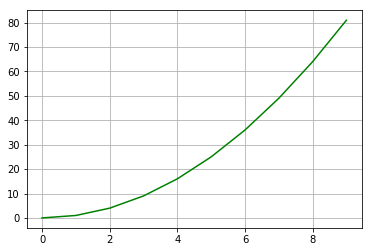

In [23]:
var1 = np.arange(0,10,1)
var2 = var1 ** 2

plt.grid()

plt.plot(var1, var2, color='green');

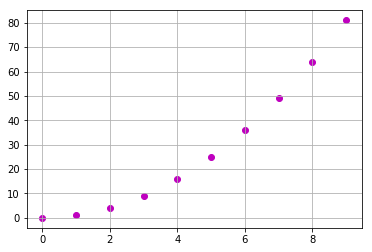

In [26]:
plt.scatter(var1, var2, color='m')

plt.grid()
plt.show();

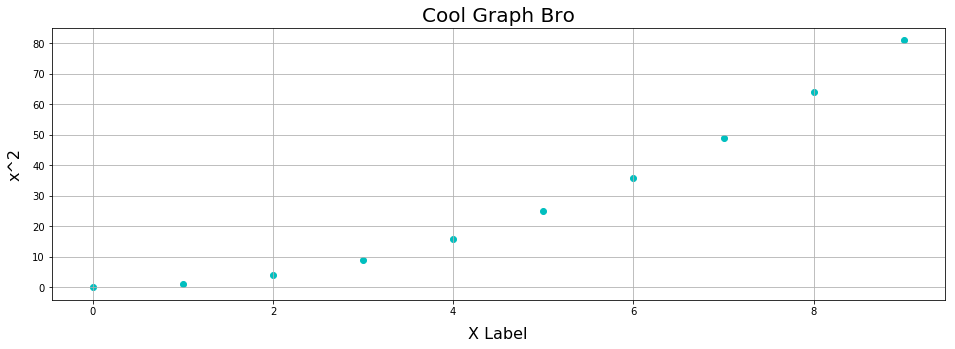

In [30]:
plt.figure(figsize=(16,5))

plt.scatter(var1, var2, color='c')

plt.grid()

plt.xlabel("X Label", fontsize = 16, labelpad=10)
plt.ylabel("x^2", fontsize = 16, labelpad=10)
plt.title("Cool Graph Bro", fontsize=20);

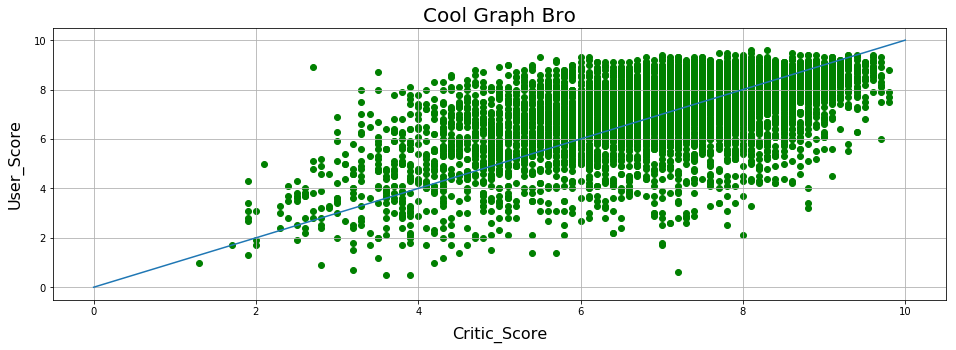

In [33]:
plt.figure(figsize=(16,5))

plt.scatter(dfc['Critic_Score'] , dfc['User_Score'], color='g')

var1 = np.arange(0,11,1)
var2 = var1

plt.plot(var1, var2)

plt.grid()
plt.xlabel("Critic_Score", fontsize = 16, labelpad=10)
plt.ylabel("User_Score", fontsize = 16, labelpad=10)

plt.title("Cool Graph Bro", fontsize=20);

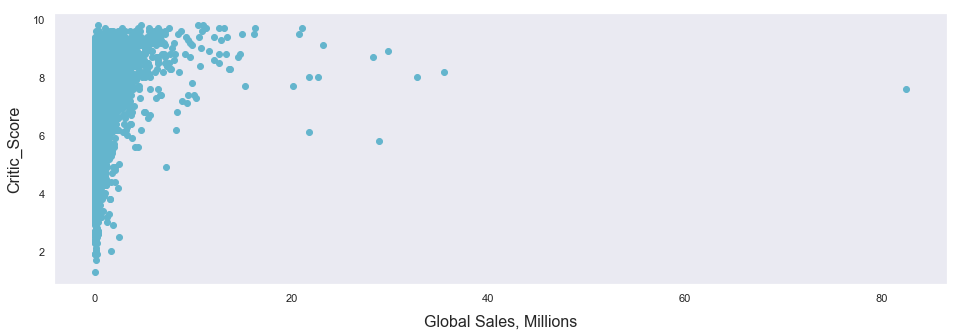

In [45]:
plt.figure(figsize=(16,5))

plt.scatter(dfc['Global_Sales'] , dfc['Critic_Score'], color='c')

plt.xlabel("Global Sales, Millions", fontsize = 16, labelpad=10)
plt.ylabel("Critic_Score", fontsize = 16, labelpad=10)

plt.grid();

In [36]:
sns.set()        #sns.set_style("darkgrid")  #dark,whitegrid, darkgrid, white, ticks

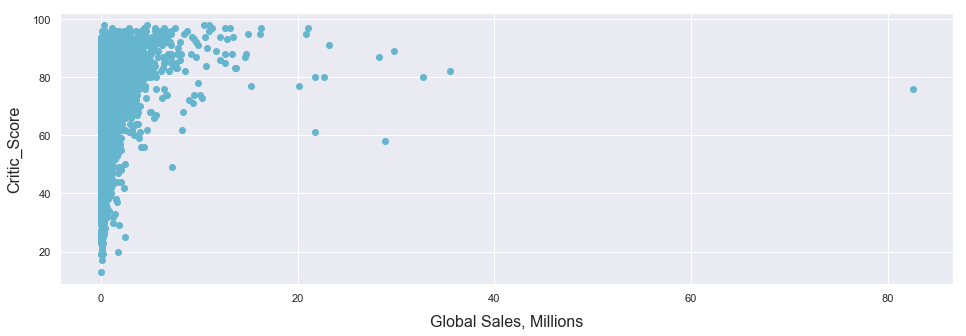

In [41]:
plt.figure(figsize=(16,5))

plt.scatter(df['Global_Sales'] , df['Critic_Score'], color='c')

plt.xlabel("Global Sales, Millions", fontsize = 16, labelpad=10)
plt.ylabel("Critic_Score", fontsize = 16, labelpad=10);

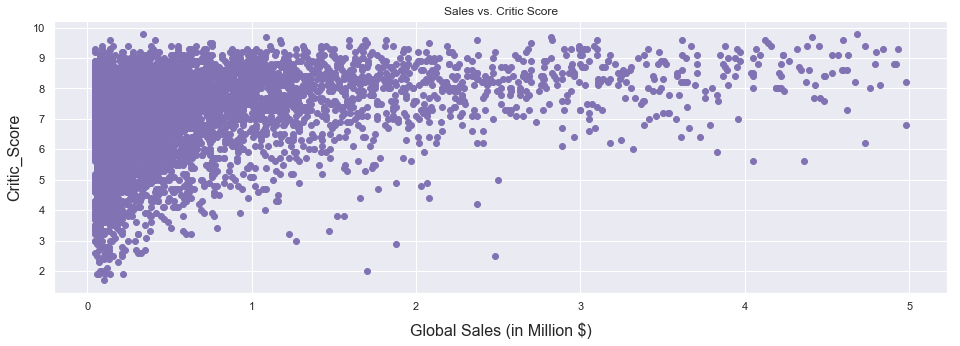

In [42]:
plt.figure(figsize=(16,5))

df_NO = dfc[(dfc['Global_Sales']<=5) & (dfc['Global_Sales']>=0.05)]

plt.scatter(df_NO['Global_Sales'] , df_NO['Critic_Score'], color='m')

plt.title("Sales vs. Critic Score")
plt.xlabel("Global Sales (in Million $)", fontsize = 16, labelpad=10)
plt.ylabel("Critic_Score", fontsize = 16, labelpad=10)

plt.show()

<Figure size 1152x360 with 0 Axes>

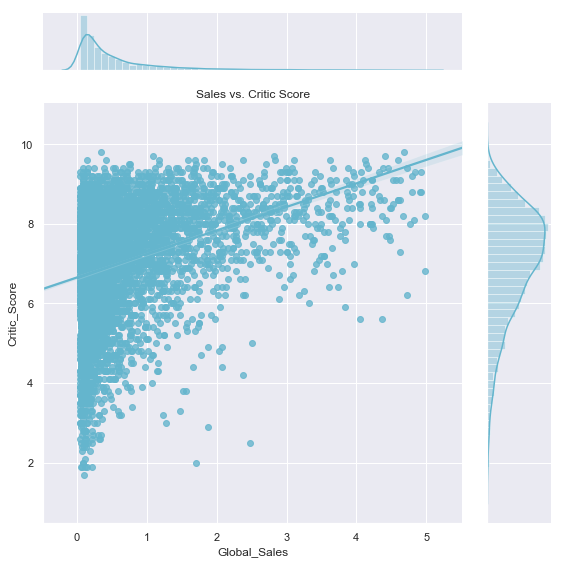

In [43]:
plt.figure(figsize=(16,5))


sns.jointplot(y='Critic_Score',x='Global_Sales',data=df_NO,kind='reg', height=8, color='c')


plt.title("Sales vs. Critic Score")
plt.tight_layout();

# Histograms

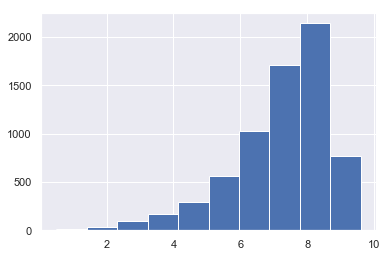

In [48]:
dfc['User_Score'].hist();

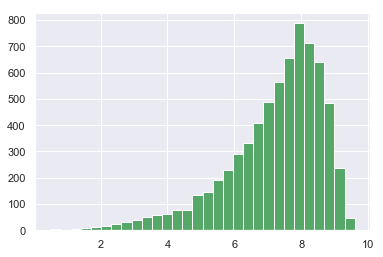

In [49]:
dfc['User_Score'].hist(color='g', bins=30);

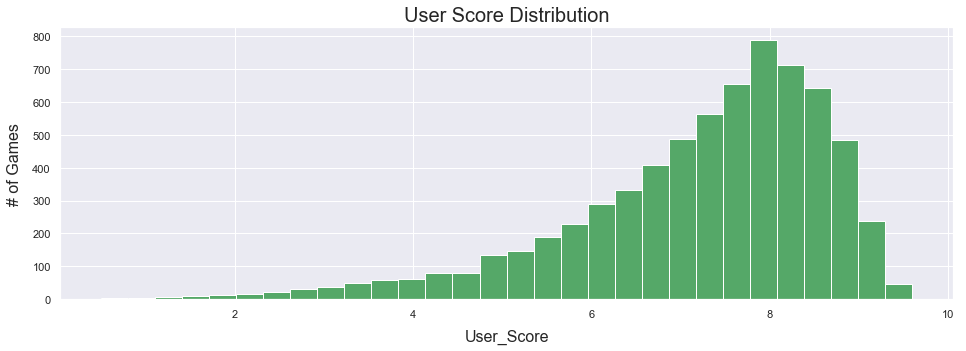

In [51]:
plt.figure(figsize=(16,5))

dfc['User_Score'].hist(color='g', bins=30)

plt.xlabel("User_Score", fontsize = 16, labelpad=10)
plt.ylabel("# of Games", fontsize = 16, labelpad=10)
plt.title("User Score Distribution", fontsize=20)

plt.show()

# Bar Plots

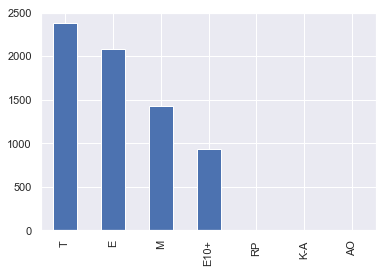

In [52]:
dfc['Rating'].value_counts().plot.bar()

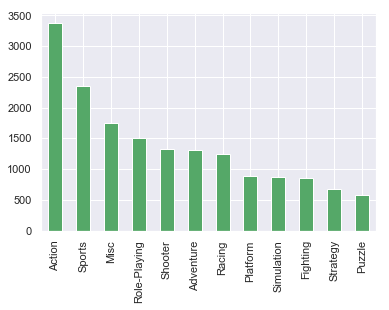

In [53]:
df['Genre'].value_counts().plot.bar(color='g')

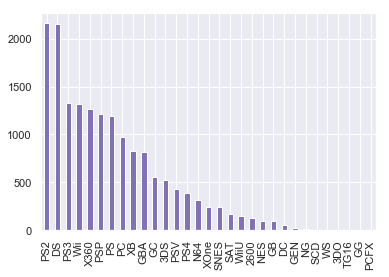

In [54]:
df['Platform'].value_counts().plot.bar(color='m')

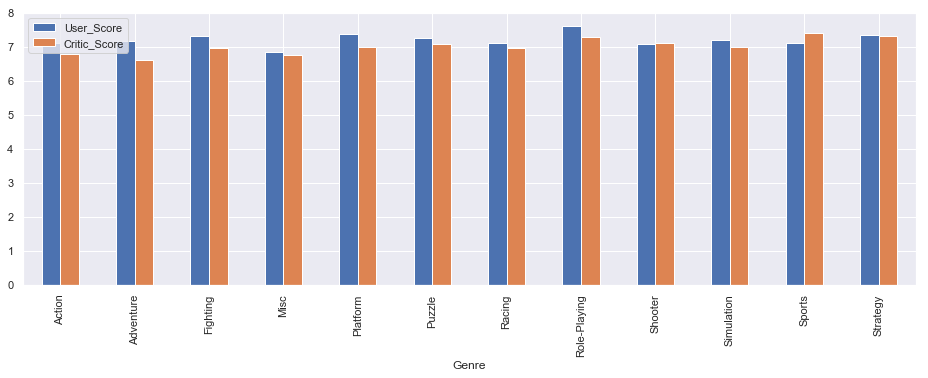

In [55]:
df_scoreMean = dfc[["User_Score", "Critic_Score", "Genre"]].groupby(["Genre"]).agg("mean")
df_scoreMean.plot.bar(figsize=(16,5))

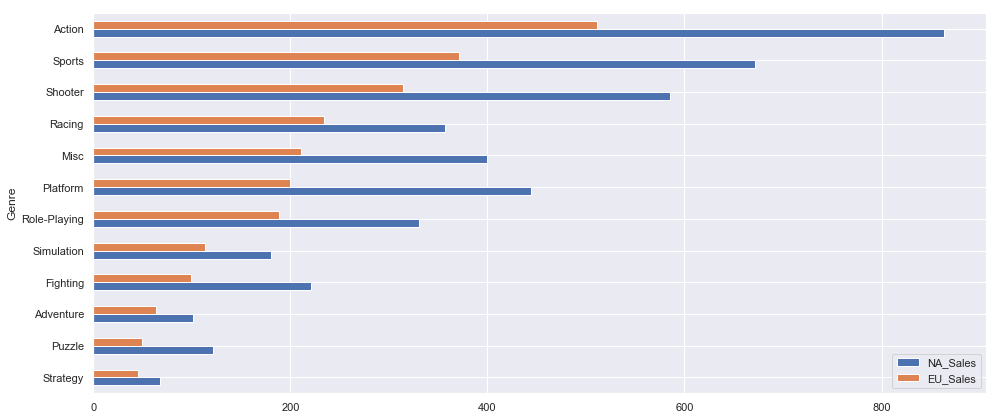

In [89]:
df_salesMean = df[["NA_Sales","EU_Sales", "Genre"]].groupby(["Genre"]).agg("sum")

df_salesMean.sort_values("EU_Sales",ascending=True, inplace=True)

df_salesMean.plot.barh(figsize=(16,7));

# Box Plot

- Useful because shows median, 25% and 75% Quartiles, and 1.5x the IQR Range. Anything beyond this is usually referred to as an outlier.
- The dots shown are the outliers

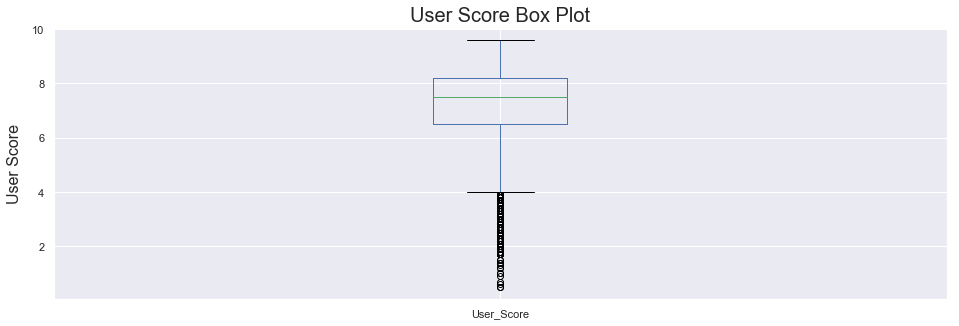

In [58]:
plt.figure(figsize=(16,5))

dfc.boxplot(column='User_Score')

plt.ylabel("User Score", fontsize = 16, labelpad=10)
plt.title("User Score Box Plot", fontsize=20);

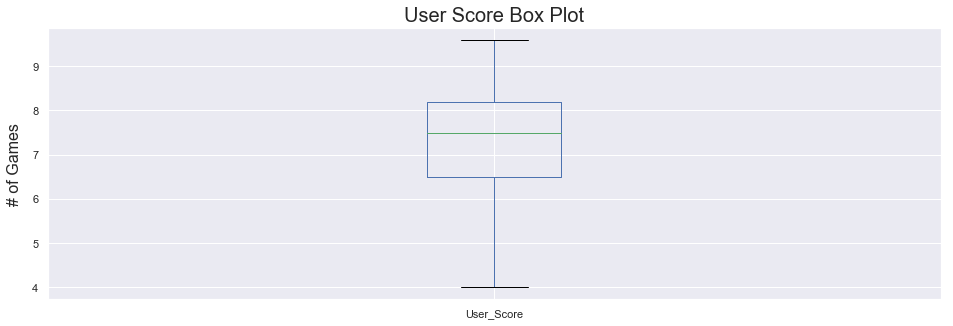

In [59]:
plt.figure(figsize=(16,5))

dfc.boxplot(column='User_Score', showfliers=False)

plt.ylabel("# of Games", fontsize = 16, labelpad=10)
plt.title("User Score Box Plot", fontsize=20);  #Green line - median, box: IQR, whiskers 1.5*IQR

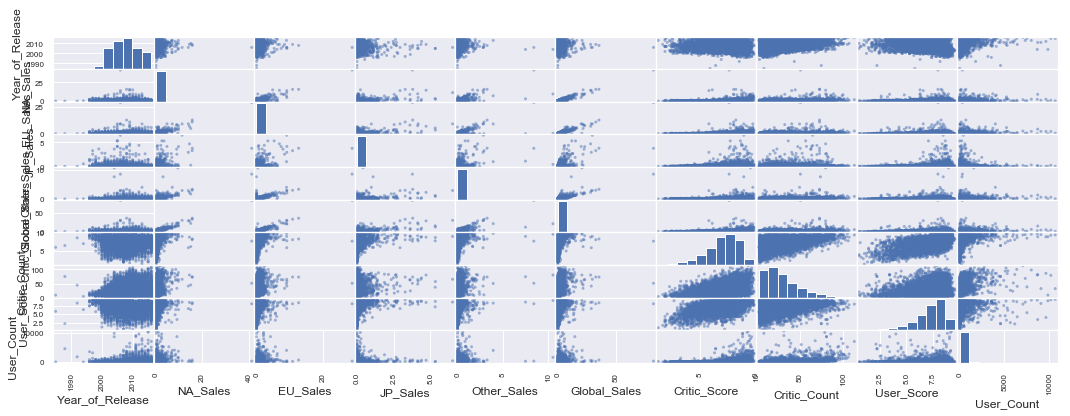

In [60]:
pd.plotting.scatter_matrix(dfc, figsize=(18,6));

## Go Deeper with Seaborn

In [91]:
dfc.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,1.000000,-0.016239,0.041346,-0.038443,0.042315,0.006661,-0.007661,0.203336,-0.253914,0.199348
NA_Sales,-0.016239,1.000000,0.841808,0.468607,0.726757,0.955793,0.233580,0.283917,0.085796,0.246208
EU_Sales,0.041346,0.841808,1.000000,0.519929,0.716330,0.939313,0.213102,0.265740,0.055915,0.283504
JP_Sales,-0.038443,0.468607,0.519929,1.000000,0.394823,0.613546,0.147314,0.168299,0.127521,0.072773
Other_Sales,0.042315,0.726757,0.716330,0.394823,1.000000,0.804028,0.191509,0.239513,0.057083,0.240085
Global_Sales,0.006661,0.955793,0.939313,0.613546,0.804028,1.000000,0.237556,0.290397,0.088349,0.264151
Critic_Score,-0.007661,0.233580,0.213102,0.147314,0.191509,0.237556,1.000000,0.396478,0.580318,0.265639
Critic_Count,0.203336,0.283917,0.265740,0.168299,0.239513,0.290397,0.396478,1.000000,0.195087,0.365603
User_Score,-0.253914,0.085796,0.055915,0.127521,0.057083,0.088349,0.580318,0.195087,1.000000,0.017546
User_Count,0.199348,0.246208,0.283504,0.072773,0.240085,0.264151,0.265639,0.365603,0.017546,1.000000


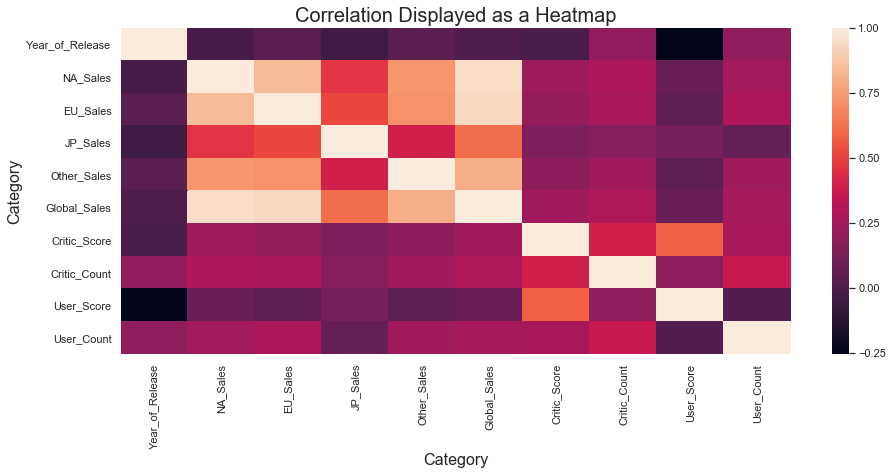

In [106]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)

sns.heatmap(dfc.corr(), ax=ax)

ax.set_xlabel(xlabel='Category', fontsize=16)
ax.set_ylabel(ylabel="Category", fontsize=16)
ax.set_title(label="Correlation Displayed as a Heatmap", fontsize=20);

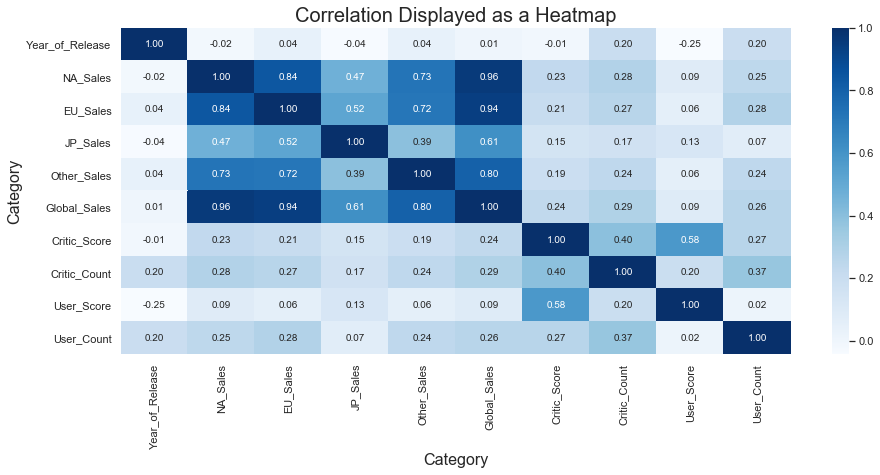

In [107]:
plt.figure(figsize=(15,6))

cmap_list = ['plasma','terrain','viridis','coolwarm','magma', "YlGnBu","Greens","Blues"]

ax=sns.heatmap(dfc.corr(), annot=True, cmap=cmap_list[-1], fmt = '.2f', robust=True)

ax.set_xlabel(xlabel='Category', fontsize=16)
ax.set_ylabel(ylabel="Category", fontsize=16)
ax.set_title(label="Correlation Displayed as a Heatmap", fontsize=20)


plt.show()

In [108]:
df_platGenre = pd.crosstab(df['Platform'],df['Genre'])
df_platGenre

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,55,1,1,5,9,8,4,0,22,1,10,0
3DO,0,1,0,0,0,1,0,0,0,1,0,0
3DS,187,37,14,54,28,20,10,87,6,29,25,15
DC,3,11,12,0,2,0,6,4,3,1,10,0
DS,333,236,36,387,89,234,66,196,42,279,146,78
GB,6,5,0,8,18,15,2,21,1,5,9,7
GBA,162,37,23,110,139,39,64,73,40,18,88,18
GC,98,20,42,35,73,12,60,25,48,12,106,11
GEN,3,2,5,1,7,0,1,3,1,0,3,1


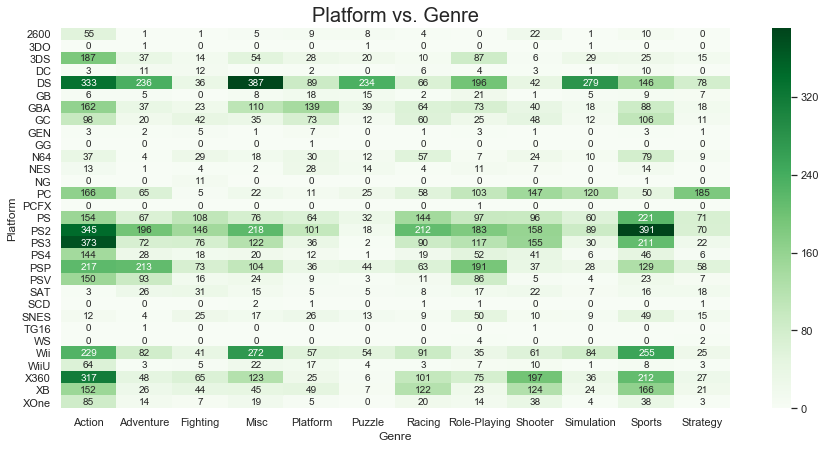

In [102]:
plt.figure(figsize=(15,7))

ax = sns.heatmap(df_platGenre, annot=True, cmap="Greens", fmt="d")
ax.set_title(label="Platform vs. Genre", fontsize=20)

plt.show()

In [109]:
df_platGenreTotal = df_platGenre.sum(axis=1).sort_values(ascending = False)
df_platGenreTotal = df_platGenreTotal[df_platGenreTotal>50]

In [104]:
df_platGenreTotal

Platform
PS2     2127
DS      2122
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      431
PS4      393
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
dtype: int64

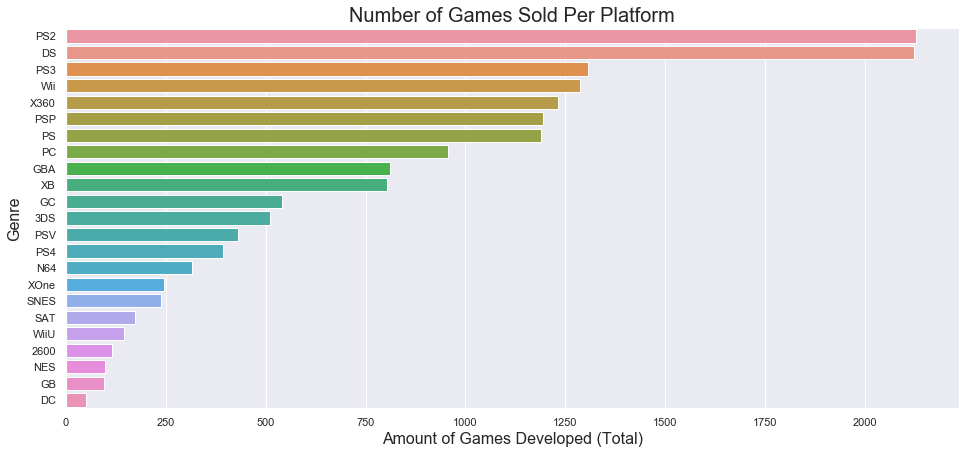

In [105]:
plt.figure(figsize=(16,7))
ax = sns.barplot(y = df_platGenreTotal.index, x = df_platGenreTotal.values, orient='h')

ax.set_xlabel(xlabel='Amount of Games Developed (Total)', fontsize=16)
ax.set_ylabel(ylabel="Genre", fontsize=16)
ax.set_title(label="Number of Games Sold Per Platform", fontsize=20)

plt.show()

In [110]:
df_platYear = pd.crosstab(df['Platform'],df['Year_of_Release'])
df_platYear

Year_of_Release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Platform,,,,,,,,,,,,,,,,,,,,,
2600,9,46,36,11,1,1,2,6,2,2,...,0,0,0,0,0,0,0,0,0,0
3DO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3DS,0,0,0,0,0,0,0,0,0,0,...,0,0,116,93,91,80,86,46,0,0
DC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DS,0,0,0,0,0,1,0,0,0,0,...,403,323,153,23,8,0,0,0,0,1
GB,0,0,0,0,0,0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0
GBA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GEN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
df_platYear = df_platYear[df_platYear.max(axis=1)>50]

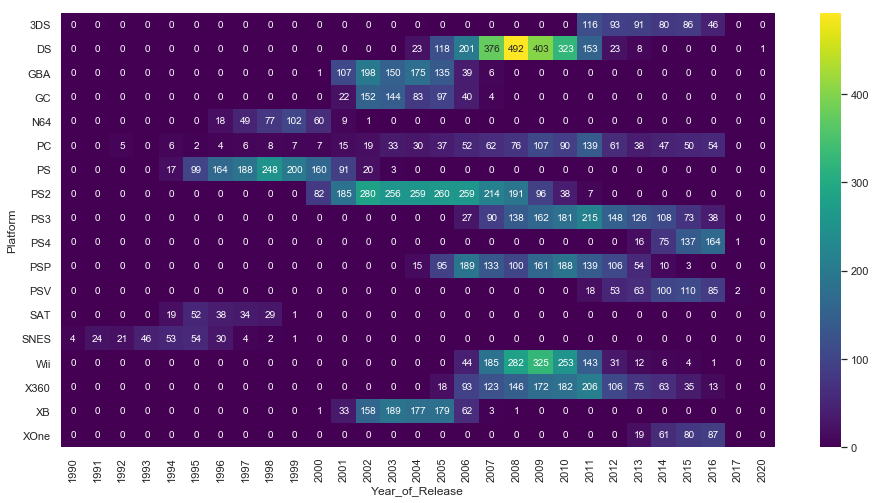

In [112]:
plt.figure(figsize=(16,8))
sns.heatmap(df_platYear.iloc[:,10:], annot=True, fmt="d",cmap='viridis')
plt.show()

In [113]:
df_year = df.groupby(['Year_of_Release']).sum()
df_year.reset_index(inplace=True)
df_year.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,1980,10.59,0.67,0.00,0.12,11.38,0.0,0.0,0.0,0.0
1,1981,33.40,1.96,0.00,0.32,35.77,0.0,0.0,0.0,0.0
2,1982,26.92,1.65,0.00,0.31,28.86,0.0,0.0,0.0,0.0
3,1983,7.76,0.80,8.10,0.14,16.79,0.0,0.0,0.0,0.0
4,1984,33.28,2.10,14.27,0.70,50.36,0.0,0.0,0.0,0.0


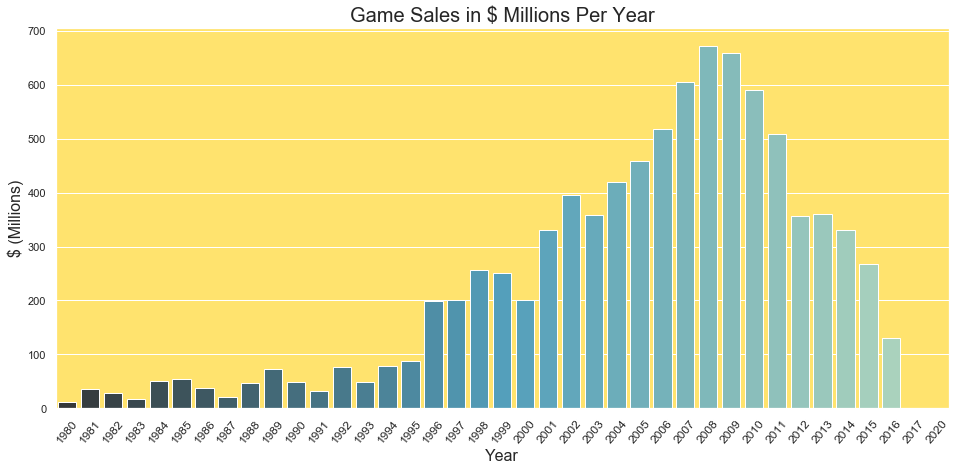

In [114]:
colors = sns.color_palette("GnBu_d", len(df_year['Year_of_Release']))
plt.figure(figsize=(16,7))

ax = sns.barplot(y = df_year['Global_Sales'], x = df_year['Year_of_Release'], palette=colors)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_xticklabels(labels = df_year['Year_of_Release'], fontsize=12, rotation=50)
ax.set_ylabel(ylabel='$ (Millions)', fontsize=16)
ax.set_title(label='Game Sales in $ Millions Per Year', fontsize=20)

ax.set_facecolor('xkcd:yellow tan')   #'xkcd:salmon',    https://xkcd.com/color/rgb/

plt.show()

In [115]:
PubRelease = df.groupby(['Publisher']).count().iloc[:,0]
PubRelease = pd.DataFrame(PubRelease.sort_values(ascending=False))[0:10]
PubRelease.columns = ['Releases']

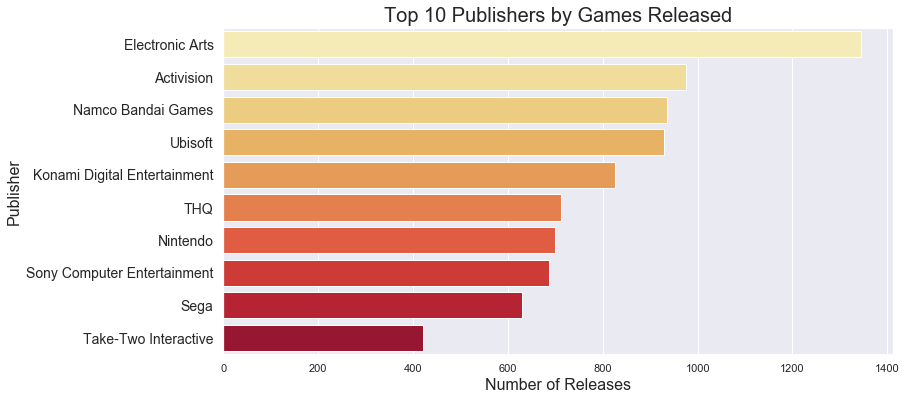

In [171]:
colors1 = sns.color_palette("magma", len(PubRelease))

plt.figure(figsize=(12,6))

ax = sns.barplot(y = PubRelease.index , x = 'Releases', data=PubRelease, orient='h', palette=colors1)
ax.set_xlabel(xlabel='Number of Releases', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Top 10 Publishers by Games Released', fontsize=20)
ax.set_yticklabels(labels = PubRelease.index, fontsize=14)

plt.show()

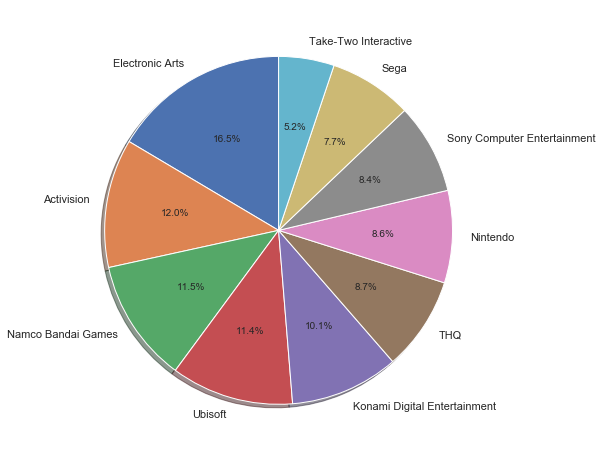

In [117]:
labels = PubRelease.index
sizes= PubRelease['Releases']

fig,ax1 = plt.subplots(figsize=(12,8))

ax1.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)  #autopct 

plt.show()

In [118]:
PubRevenue = df.groupby(['Publisher']).sum()['Global_Sales']
PubRevenue = pd.DataFrame(PubRevenue.sort_values(ascending=False))[0:10]

PubRevenue.head()

,Global_Sales
Publisher,
Nintendo,1786.72
Electronic Arts,1100.05
Activision,725.14
Sony Computer Entertainment,606.27
Ubisoft,470.45


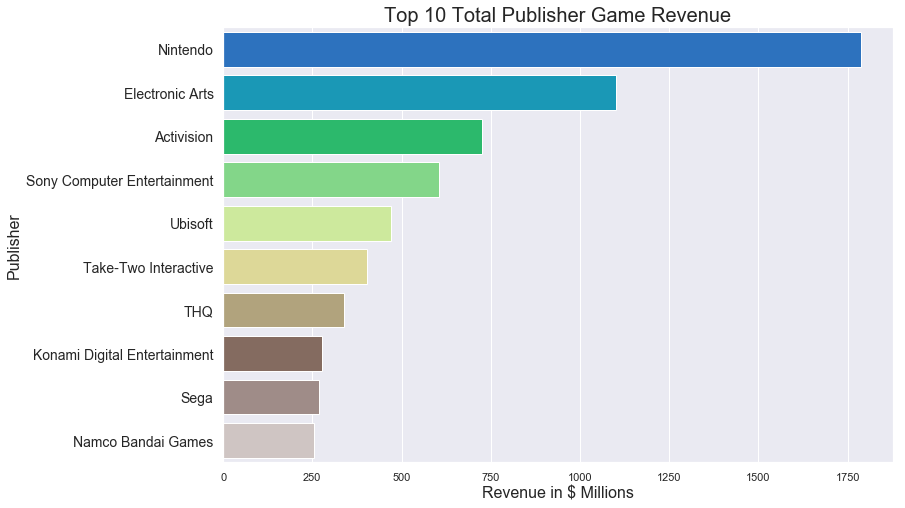

In [119]:
colors2 = sns.color_palette("terrain", len(PubRevenue))

plt.figure(figsize=(12,8))
ax = sns.barplot(y = PubRevenue.index , x = 'Global_Sales', data=PubRevenue, orient='h', palette=colors2)
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Top 10 Total Publisher Game Revenue', fontsize=20)
ax.set_yticklabels(labels = PubRevenue.index, fontsize=14)
plt.show()

#### Subplots

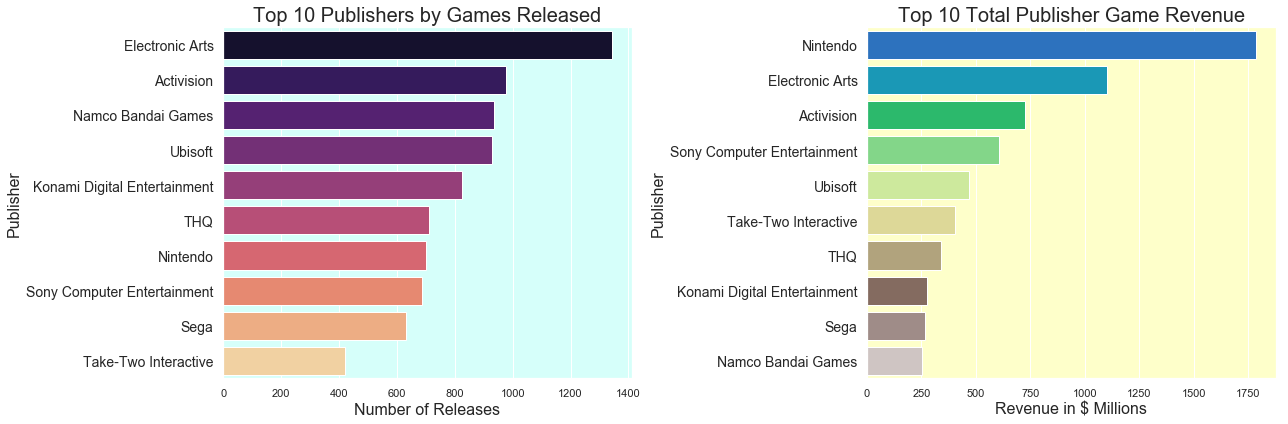

In [120]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(18,6))

ax1 = sns.barplot(y = PubRelease.index , x = 'Releases', data=PubRelease, orient='h', ax=ax1, palette=colors1)
ax1.set_xlabel(xlabel='Number of Releases', fontsize=16)
ax1.set_ylabel(ylabel='Publisher', fontsize=16)
ax1.set_title(label='Top 10 Publishers by Games Released', fontsize=20)
ax1.set_yticklabels(labels = PubRelease.index, fontsize=14)
ax1.set_facecolor('xkcd:ice')


ax2 = sns.barplot(y = PubRevenue.index , x = 'Global_Sales', data=PubRevenue, orient='h', palette=colors2, ax=ax2)
ax2.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax2.set_ylabel(ylabel='Publisher', fontsize=16)
ax2.set_title(label='Top 10 Total Publisher Game Revenue', fontsize=20)
ax2.set_yticklabels(labels = PubRevenue.index, fontsize=14)
ax2.set_facecolor('xkcd:ecru')

plt.tight_layout()
plt.show()


# Line Graph

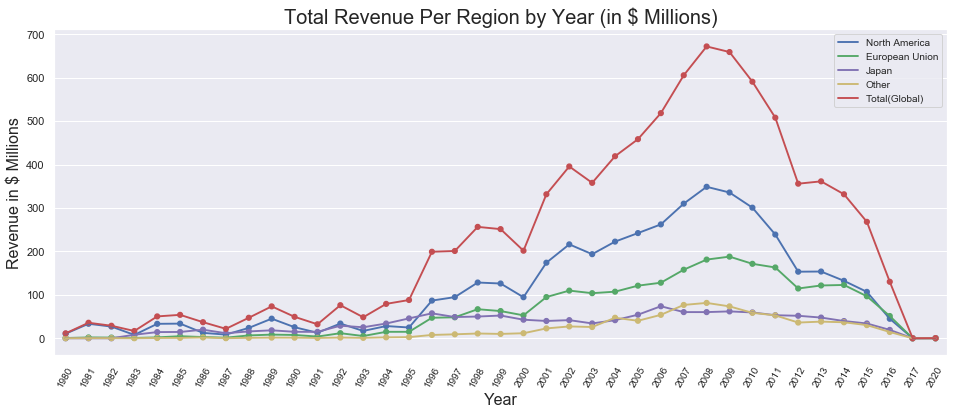

In [121]:
regions = ['North America','European Union','Japan','Other','Total(Global)']

plt.figure(figsize=(16,6))

ax = sns.pointplot(x=df_year['Year_of_Release'], y=df_year['NA_Sales'], color='b', scale=0.7)
ax = sns.pointplot(x=df_year['Year_of_Release'], y=df_year['EU_Sales'], color='g', scale=0.7)
ax = sns.pointplot(x=df_year['Year_of_Release'], y=df_year['JP_Sales'], color='m', scale=0.7)
ax = sns.pointplot(x=df_year['Year_of_Release'], y=df_year['Other_Sales'], color='y', scale=0.7)
ax = sns.pointplot(x=df_year['Year_of_Release'], y=df_year['Global_Sales'], color='r', scale=0.7)

ax.set_xticklabels(labels=df_year['Year_of_Release'], fontsize=10, rotation=60)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Revenue in $ Millions', fontsize=16)
ax.set_title(label='Total Revenue Per Region by Year (in $ Millions)', fontsize=20)
ax.legend(handles=ax.lines[::len(df_year['Year_of_Release'])+1], labels=regions, fancybox=True, fontsize=10)

plt.show()

## Boxplot

In [122]:
Publishers_10 = PubRevenue.head(10)
df_t10 = df[df['Publisher'].isin(Publishers_10.index)]

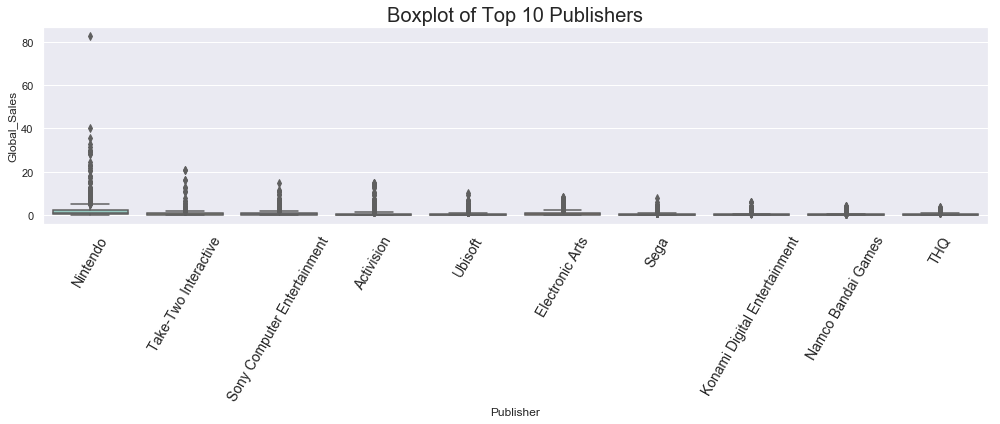

In [123]:
plt.figure(figsize=(14,6))

sns.boxplot(x=df_t10['Publisher'], y=df_t10['Global_Sales'],data=df_t10, palette="Set3")

plt.title(label='Boxplot of Top 10 Publishers', fontsize=20)

plt.xticks(rotation=60, fontsize=14)
plt.tight_layout()

plt.show()

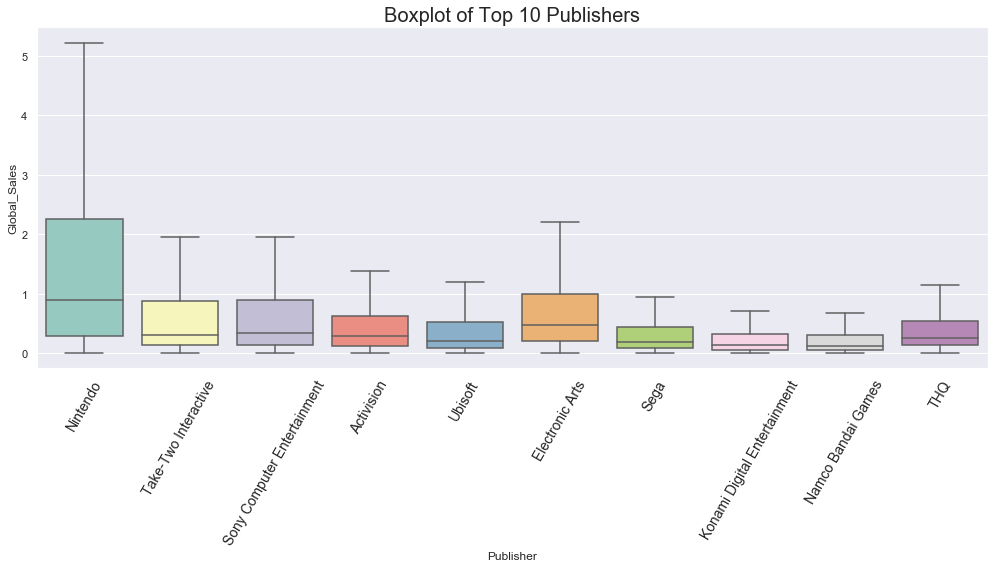

In [124]:
plt.figure(figsize=(14,8))

sns.boxplot(x=df_t10['Publisher'], y=df_t10['Global_Sales'],data=df_t10, palette="Set3", showfliers=False)

plt.title(label='Boxplot of Top 10 Publishers', fontsize=20)

plt.xticks(rotation=60, fontsize=14)
plt.tight_layout()

plt.show()

## Violin Plot

In [125]:
df_t10_NO = df_t10[(df_t10['Global_Sales']<=2) & (df_t10['Global_Sales']>=0.05)]

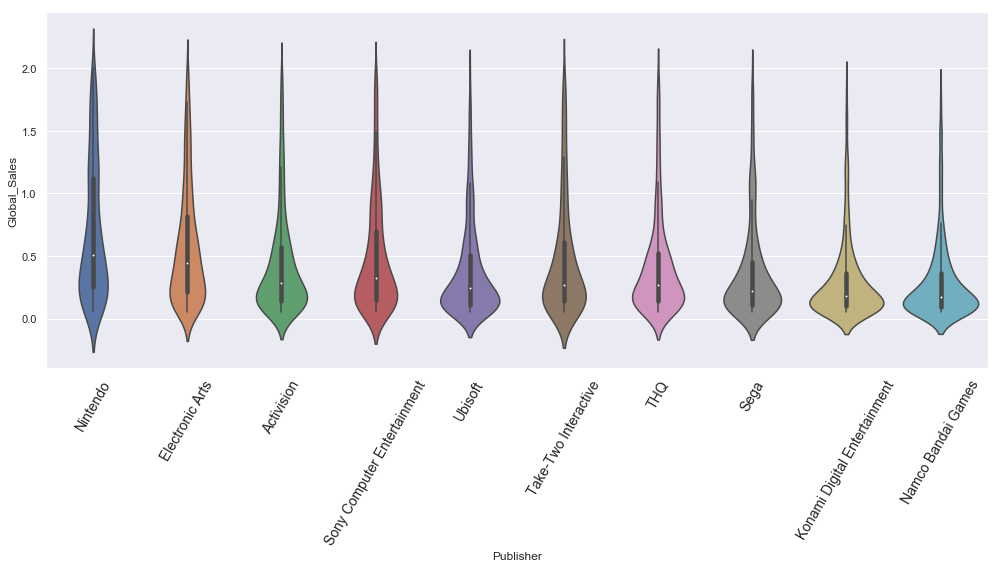

In [126]:
plt.figure(figsize=(14,8))
sns.violinplot(x=df_t10_NO['Publisher'], y=df_t10_NO['Global_Sales'],data=df_t10_NO, showfliers=False)

plt.xticks(rotation=60, fontsize=14)
plt.tight_layout()
plt.show()
#sns.despine(offset=10, trim=True);

# Distribution Plot with Seaborn

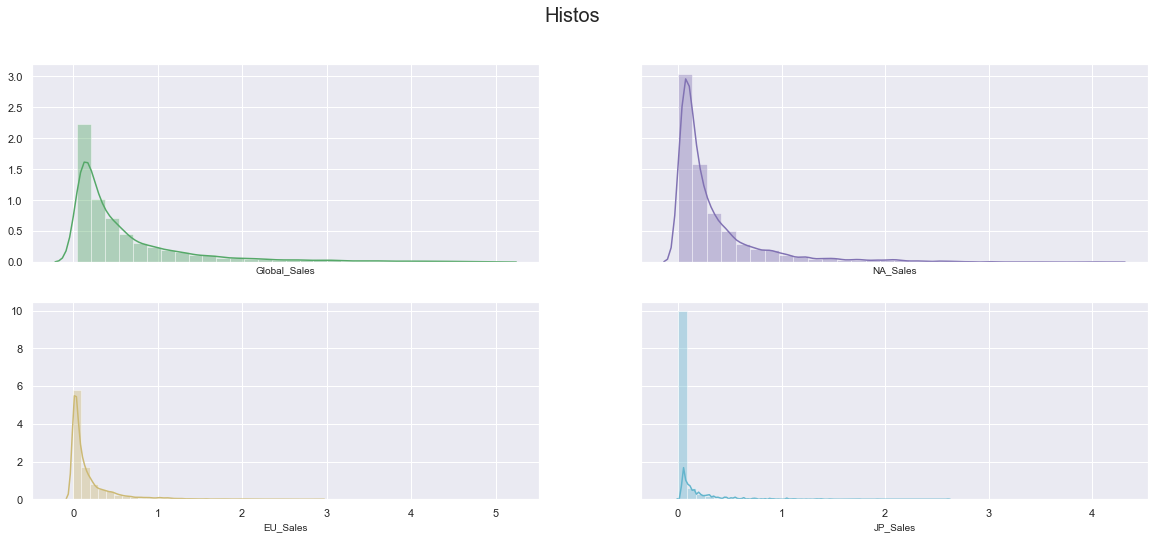

In [170]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,8), sharey='row', sharex='col')

fig.suptitle('Histos', fontsize=20)

sns.distplot(df_NO['Global_Sales'], bins=30, ax=ax1, color='g')
ax1.set_xlabel('Global_Sales', fontsize=10)

sns.distplot(df_NO['NA_Sales'], bins=30, ax=ax2, color='m');
ax2.set_xlabel('NA_Sales', fontsize=10)

sns.distplot(df_NO['EU_Sales'], bins=30, ax=ax3, color='y')
ax3.set_xlabel('EU_Sales', fontsize=10)

sns.distplot(df_NO['JP_Sales'], bins=30, ax=ax4, color='c');
ax4.set_xlabel('JP_Sales', fontsize=10)

#plt.tight_layout()

plt.show()

# Word Cloud

In [129]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [133]:
text = dfc.Name

In [172]:
text

0                                         Wii Sports
1                                     Mario Kart Wii
2                                  Wii Sports Resort
3                              New Super Mario Bros.
4                                           Wii Play
5                          New Super Mario Bros. Wii
6                                      Mario Kart DS
7                                            Wii Fit
8                                 Kinect Adventures!
9                                       Wii Fit Plus
10                                Grand Theft Auto V
11                     Grand Theft Auto: San Andreas
12      Brain Age: Train Your Brain in Minutes a Day
13                                Grand Theft Auto V
14                       Grand Theft Auto: Vice City
15       Brain Age 2: More Training in Minutes a Day
16                            Gran Turismo 3: A-Spec
17                    Call of Duty: Modern Warfare 3
18                           Call of Duty: Bla

In [134]:
text[0]

'Wii Sports'

In [135]:
l = ''

for i, item in text.iteritems():
    l += (' ' + item)

In [136]:
stopwords = ["II",'The','the','of','and','of the','Game','III']

In [173]:
wordcloud1 = WordCloud(stopwords=stopwords,max_font_size=70,max_words=100,background_color="black").generate(l)

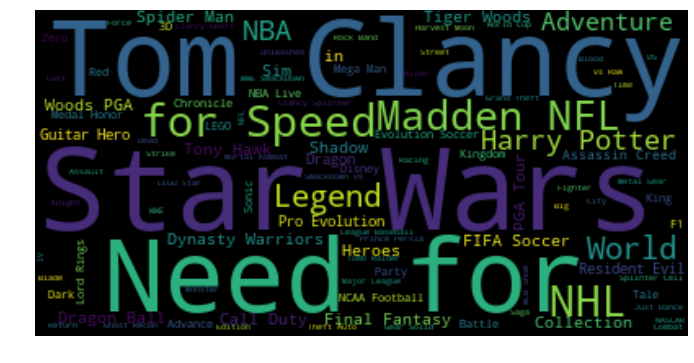

In [174]:
plt.figure(figsize=(12,6))
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.show()